### Ejercicio 3: Validación y rediseño.

Una vez realizados los cálculos analíticos del **Ejercicio 1** (Planta de 1er orden + PI), procederemos a validar los resultados mediante simulación.

Asumiremos que los cálculos teóricos para $\zeta=0.707$ y $\omega_n=5$ rad/s arrojaron los siguientes valores:
* $K_p = 0.507$
* $K_i = 2.5$

**Instrucciones:**

1.  **Ejecute la celda de código inferior:** Esta celda contiene la definición del sistema con los valores teóricos calculados, genera la gráfica de respuesta al escalón y muestra las métricas de desempeño.
2.  **Analice los resultados:** Observe las métricas impresas. ¿Se cumple el sobreimpulso máximo del 5% que prometía la teoría?

--- Función de transferencia de lazo cerrado (Teórico). ---
<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     5.07 s + 25
  -----------------
  s^2 + 7.07 s + 25


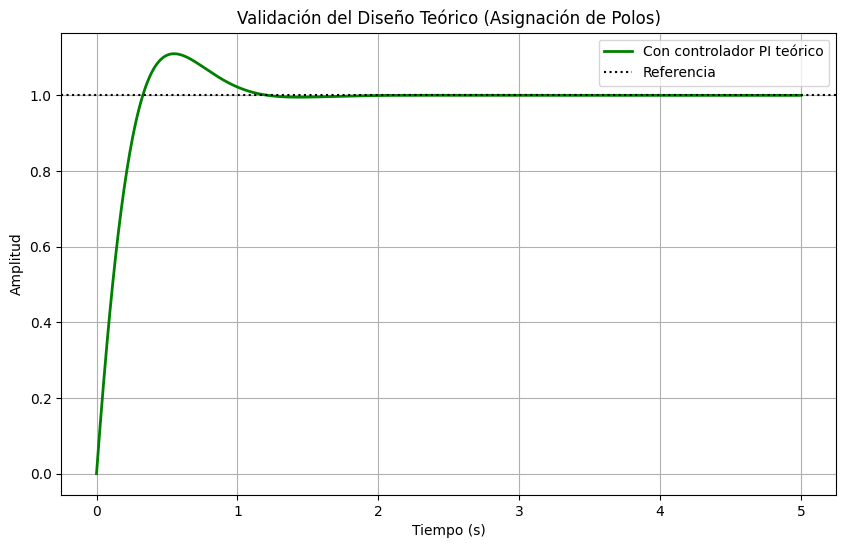

--- Análisis de Polos y Ceros. ---
Polos del sistema controlado: [-3.535+3.53606773j -3.535-3.53606773j]
Ceros del sistema controlado: [-4.93096647+0.j]


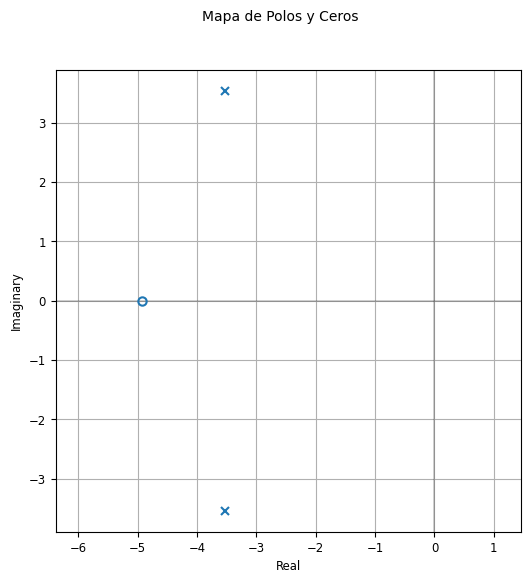


--- Métricas de desempeño del sistema (PI Teórico). ---
- Métricas teóricas esperadas para zeta=0.707 y wn=5 rad/s:
           - Mp ≈ 4.3%
           - Ts ≈ 1.13 s.

- Métricas reales de la simulación:
Sobreimpulso (Overshoot):       11.01 %
Tiempo de Establecimiento (2%): 1.0264 s
Valor Final:                    1.0000


In [ ]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definición del sistema y controlador. ---
# Planta Gp(s) = 10 / (s+2).
num_p = [10]
den_p = [1, 2]
Gp = ct.tf(num_p, den_p)

# Controlador PI Teórico: Gc = (Kps + Ki)/s.
# Valores obtenidos del diseño teórico (Zeta=0.707)
Kp_teo = 0.507
Ki_teo = 2.5
Gc = ct.tf([Kp_teo, Ki_teo], [1, 0])

# Sistema en lazo cerrado con el controlador: G_LC = (Gc*Gp) / (1 + Gc*Gp).
G_LC = ct.feedback(Gc * Gp, 1)
print("--- Función de transferencia de lazo cerrado (Teórico). ---")
print(G_LC)


# --- 2. Simulación y gráfica de las respuestas. ---
# Vector de tiempo: 0 a 5 segundos.
t = np.linspace(0, 5, 1000)

# Obtener respuesta al escalón.
_, y_LC = ct.step_response(G_LC, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_LC, 'g-', linewidth=2,  label='Con controlador PI teórico')
plt.axhline(y=1, color='k', linestyle=':', label='Referencia')

plt.title('Validación del Diseño Teórico (Asignación de Polos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# --- 3. Mapa de Polos y Ceros ---
print("--- Análisis de Polos y Ceros. ---")
polos = ct.poles(G_LC)
ceros = ct.zeros(G_LC)
print(f"Polos del sistema controlado: {polos}")
print(f"Ceros del sistema controlado: {ceros}")

plt.figure(figsize=(6, 6))
ct.pzmap(G_LC, title='Mapa de Polos y Ceros')
plt.grid(True)
plt.show()


# --- 4. Métricas de desempeño. ---
info = ct.step_info(G_LC)
print("\n--- Métricas de desempeño del sistema (PI Teórico). ---")
print("""- Métricas teóricas esperadas para zeta=0.707 y wn=5 rad/s:
           - Mp ≈ 4.3%
           - Ts ≈ 1.13 s.""")

print(f"\n- Métricas reales de la simulación:")
print(f"Sobreimpulso (Overshoot):       {info['Overshoot']:.2f} %")
print(f"Tiempo de Establecimiento (2%): {info['SettlingTime']:.4f} s")
print(f"Valor Final:                    {y_LC[-1]:.4f}")

#### Realice lo siguiente.

Al ejecutar la simulación anterior, notará que el sobreimpulso real es mayor al 4.3% esperado teóricamente.
Esto se debe a la presencia del cero ($s = -K_i/K_p$) introducido por el controlador PI, el cual no fue considerado en las fórmulas estándar de segundo orden usadas para el cálculo.

**Actividad a realizar:**
Rediseñe las ganancias del controlador ($K_p$ y/o $K_i$) para lograr que el sobreimpulso sea **menor o igual al 5%**.

1.  **Rediseño:** Puede proponer un nuevo $\zeta$ (mayor a 0.707) y recalcular, o utilizar el método de LGR para ajustar la ganancia. *Nota: Para este rediseño, puede ser flexible con el requisito del tiempo de establecimiento.* 
2.  **Justificación:** En una nueva celda de Markdown (incluyendo sus cálculos en fotografía, como cólidgo o como celda de Markdown/Python), justifique brevemente su elección mostrando el nuevo cálculo. **(2.5 puntos)**
3.  **Comparación:** Agregue una celda de código final donde grafique en la misma figura: **(1.0 puntos)**
    * La respuesta con el PI Teórico (Original).
    * La respuesta con el PI Rediseñado (Modificado).
    * Imprima las nuevas métricas para verificar el cumplimiento.

### Recalculo de las ganancias ###


Modificando de la siguiente manera:
$$\zeta = 0.9$$
$$T_s = 1.13 \, s$$

***1. Cálculo de la frecuencia natural ($\omega_n$)***
Usando el criterio del 2% para el tiempo de asentamiento:
$$\omega_n = \frac{4}{\zeta T_s} = \frac{4}{(0.9)(1.13)} = 3.93 \, \text{rad/s}$$

*** 2. Ecuación Característica Deseada***
Sustituimos los valores en la forma estándar $s^2 + 2\zeta\omega_n s + \omega_n^2$:

$$s^2 + 2(0.9)(3.93)s + (3.93)^2$$

$$= s^2 + 7.074s + 15.44$$

*** 3. Igualación con el Sistema (Lazo Cerrado) ***
La ecuación característica del sistema es:
$$s^2 + s(2 + 10 k_p) + 10 k_i$$

Igualamos término a término con la ecuación deseada:
$$s^2 + s(2 + 10 k_p) + 10 k_i = s^2 + 7.074s + 15.44$$

*** 4. Despeje de ganancias ($k_p$ y $k_i$) ***

**Para $k_p$:**
$$
\begin{align*}
2 + 10k_p &= 7.074 \\
10k_p &= 7.074 - 2 \\
k_p &= \frac{5.074}{10} \\
k_p &= \mathbf{0.507}
\end{align*}
$$

**Para $k_i$:**
$$
\begin{align*}
10k_i &= 15.44 \\
k_i &= \frac{15.44}{10} \\
k_i &= \mathbf{1.544}
\end{align*}
$$

--- Función de transferencia de lazo cerrado (rediseñado). ---
<TransferFunction>: sys[92]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     5.07 s + 15.44
  --------------------
  s^2 + 7.07 s + 15.44
--- Función de transferencia de lazo cerrado (Teórico). ---
<TransferFunction>: sys[95]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     5.07 s + 25
  -----------------
  s^2 + 7.07 s + 25


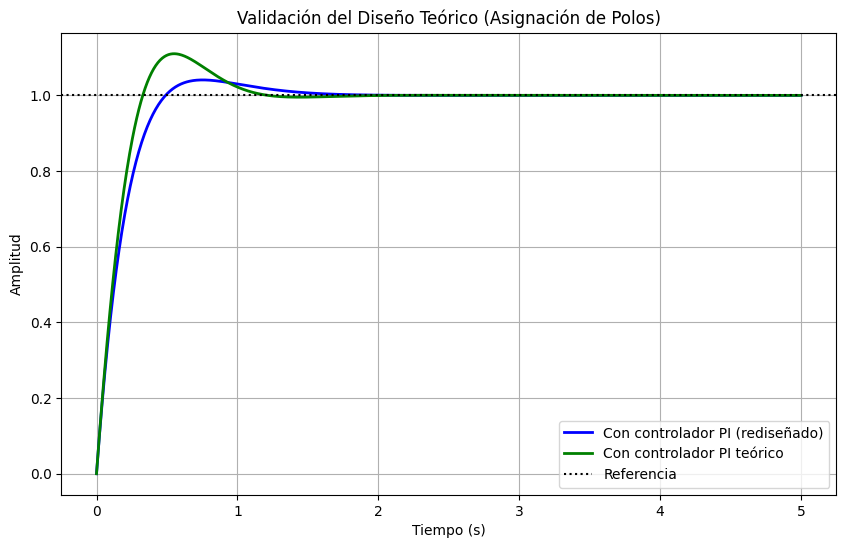

--- Análisis de Polos y Ceros(rediseñado). ---
Polos del sistema controlado: [-3.535+1.71574328j -3.535-1.71574328j]
Ceros del sistema controlado: [-3.04536489+0.j]
--- Análisis de Polos y Ceros. ---
Polos del sistema controlado: [-3.535+3.53606773j -3.535-3.53606773j]
Ceros del sistema controlado: [-4.93096647+0.j]


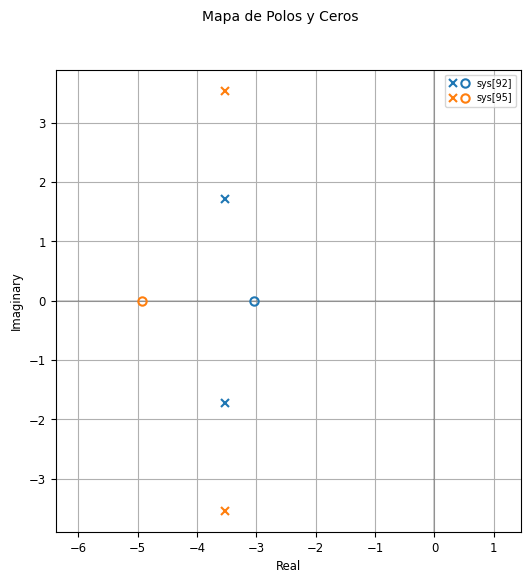


--- Métricas de desempeño del sistema (PI rediseñado). ---
- Métricas teóricas esperadas para zeta=0.93 y wn=3.93 rad/s:
           - Mp ≈ 0.15%
           - Ts ≈ 1.13 s.

- Métricas reales de la simulación:
Sobreimpulso (Overshoot):       4.08 %
Tiempo de Establecimiento (2%): 1.1843 s
Valor Final:                    1.0000

--- Métricas de desempeño del sistema (PI Teórico). ---
- Métricas teóricas esperadas para zeta=0.707 y wn=5 rad/s:
           - Mp ≈ 4.3%
           - Ts ≈ 1.13 s.

- Métricas reales de la simulación:
Sobreimpulso (Overshoot):       11.01 %
Tiempo de Establecimiento (2%): 1.0264 s
Valor Final:                    1.0000


In [10]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definición del sistema y controlador. ---
# Planta Gp(s) = 10 / (s+2).
num_p1 = [10]
den_p1 = [1, 2]
Gp1 = ct.tf(num_p, den_p)

num_p = [10]
den_p = [1, 2]
Gp = ct.tf(num_p, den_p)

# Controlador PI Teórico: Gc = (Kps + Ki)/s.
# Valores obtenidos del diseño teórico (Zeta=0.707)
Kp = 0.507
Ki = 1.544

Kp_teo = 0.507
Ki_teo = 2.5


Gc = ct.tf([Kp_teo, Ki_teo], [1, 0])
Gc1 = ct.tf([Kp, Ki], [1, 0])

# Sistema en lazo cerrado con el controlador: G_LC = (Gc*Gp) / (1 + Gc*Gp).
G_LC1 = ct.feedback(Gc1 * Gp1, 1)
print("--- Función de transferencia de lazo cerrado (rediseñado). ---")
print(G_LC1)

G_LC = ct.feedback(Gc * Gp, 1)
print("--- Función de transferencia de lazo cerrado (Teórico). ---")
print(G_LC)



# --- 2. Simulación y gráfica de las respuestas. ---
# Vector de tiempo: 0 a 5 segundos.
t1 = np.linspace(0, 5, 1000)
t = np.linspace(0, 5, 1000)

# Obtener respuesta al escalón.
_, y_LC1 = ct.step_response(G_LC1, T=t)
_, y_LC = ct.step_response(G_LC, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t1, y_LC1, 'b-', linewidth=2,  label='Con controlador PI (rediseñado)')
plt.plot(t, y_LC, 'g-', linewidth=2,  label='Con controlador PI teórico')
plt.axhline(y=1, color='k', linestyle=':', label='Referencia')

plt.title('Validación del Diseño Teórico (Asignación de Polos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# --- 3. Mapa de Polos y Ceros ---
print("--- Análisis de Polos y Ceros(rediseñado). ---")
polos1 = ct.poles(G_LC1)
ceros1 = ct.zeros(G_LC1)
print(f"Polos del sistema controlado: {polos1}")
print(f"Ceros del sistema controlado: {ceros1}")
print("--- Análisis de Polos y Ceros. ---")
polos = ct.poles(G_LC)
ceros = ct.zeros(G_LC)
print(f"Polos del sistema controlado: {polos}")
print(f"Ceros del sistema controlado: {ceros}")

plt.figure(figsize=(6, 6))
ct.pzmap(G_LC1, title='Mapa de Polos y Ceros(rediseñado)')
ct.pzmap(G_LC, title='Mapa de Polos y Ceros')
plt.grid(True)
plt.show()


# --- 4. Métricas de desempeño. ---
info = ct.step_info(G_LC1)
print("\n--- Métricas de desempeño del sistema (PI rediseñado). ---")
print("""- Métricas teóricas esperadas para zeta=0.93 y wn=3.93 rad/s:
           - Mp ≈ 0.15%
           - Ts ≈ 1.13 s.""")

print(f"\n- Métricas reales de la simulación:")
print(f"Sobreimpulso (Overshoot):       {info['Overshoot']:.2f} %")
print(f"Tiempo de Establecimiento (2%): {info['SettlingTime']:.4f} s")
print(f"Valor Final:                    {y_LC[-1]:.4f}")

info = ct.step_info(G_LC)
print("\n--- Métricas de desempeño del sistema (PI Teórico). ---")
print("""- Métricas teóricas esperadas para zeta=0.707 y wn=5 rad/s:
           - Mp ≈ 4.3%
           - Ts ≈ 1.13 s.""")

print(f"\n- Métricas reales de la simulación:")
print(f"Sobreimpulso (Overshoot):       {info['Overshoot']:.2f} %")
print(f"Tiempo de Establecimiento (2%): {info['SettlingTime']:.4f} s")
print(f"Valor Final:                    {y_LC[-1]:.4f}")
